In [51]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('tracks.csv')

# Select a random sample of 20% of the data
df = df.sample(frac=0.2, random_state=42)


Popularity Statistics:

mean      27.562795
median    27.000000
25%       13.000000
75%       40.000000
std       18.292529
Name: popularity, dtype: float64


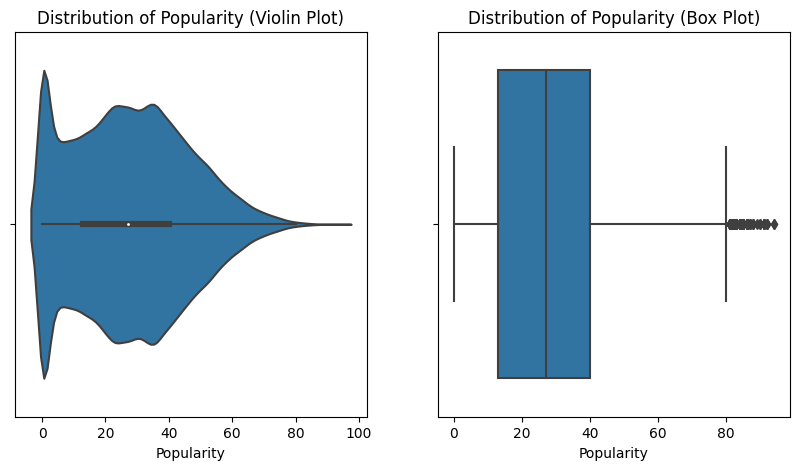

In [52]:
#First let us examine the distribution of popularity in the dataset
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the mean, median, quartiles, and variance of popularity
popularity_stats = df['popularity'].describe()[['mean', '50%', '25%', '75%', 'std']]
popularity_stats.rename(index={'50%': 'median'}, inplace=True)

print('Popularity Statistics:\n')
print(popularity_stats)

# Create a violin plot and box plot of popularity
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['popularity'], ax=axes[0])
axes[0].set_title('Distribution of Popularity (Violin Plot)')
axes[0].set_xlabel('Popularity')

sns.boxplot(x=df['popularity'], ax=axes[1])
axes[1].set_title('Distribution of Popularity (Box Plot)')
axes[1].set_xlabel('Popularity')

plt.show()

Based on this we cann see that on average a song's popularity is 27.56 and there is a high variance of 18.29. On the box plot, we can see a considerable number on anomolies. Moving forward, we will try to account for factors that contribute to such outliers.

## Duration and Popularity

Duration Statistics:

mean      230283 ms
median    214987 ms
25%       175213 ms
75%       264000 ms
std       126151 ms
Name: duration_ms, dtype: object


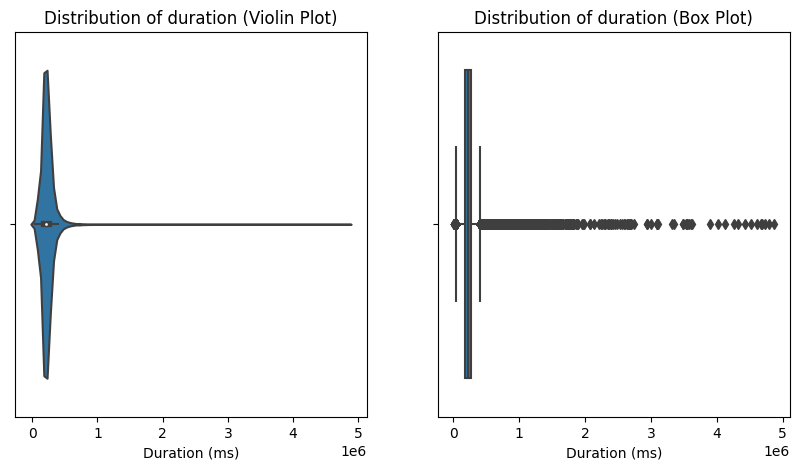

In [53]:
# Calculate the mean, median, quartiles, and variance of duration
duration_stats = df['duration_ms'].describe()[['mean', '50%', '25%', '75%', 'std']]
duration_stats.rename(index={'50%': 'median'}, inplace=True)
duration_stats = duration_stats.astype(int).astype(str) + ' ms'

print('Duration Statistics:\n')
print(duration_stats)

# Create a violin plot and box plot of duration
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['duration_ms'], ax=axes[0])
axes[0].set_title('Distribution of duration (Violin Plot)')
axes[0].set_xlabel('Duration (ms)')

sns.boxplot(x=df['duration_ms'], ax=axes[1])
axes[1].set_title('Distribution of duration (Box Plot)')
axes[1].set_xlabel('Duration (ms)')

plt.show()

Based on this distirbution, we can see a high number of anomolies on one side as well. Next, let us see if this accounts for popularity in any case

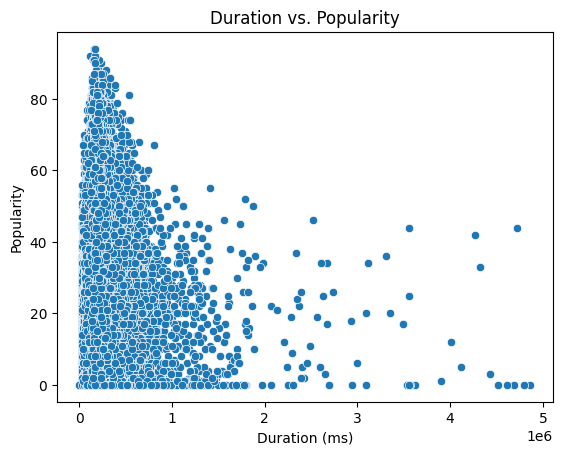

Correlation coefficient: 0.026198844435751677


In [64]:
#Next, let us see if there is a direct relationship between duration and popularity through a scatter plot

# Create a scatter plot of duration_ms vs. popularity
sns.scatterplot(x='duration_ms', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Duration vs. Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between duration_ms and popularity
corr = df['duration_ms'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

Based on this, we see that the correlation coefficient is extremely low and popularity does not seem to be related to duration at all. However, we notice that songs with popularity over 60 always have a relatively low duration. Let us now account for this using a new analysis method - Clusetering

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


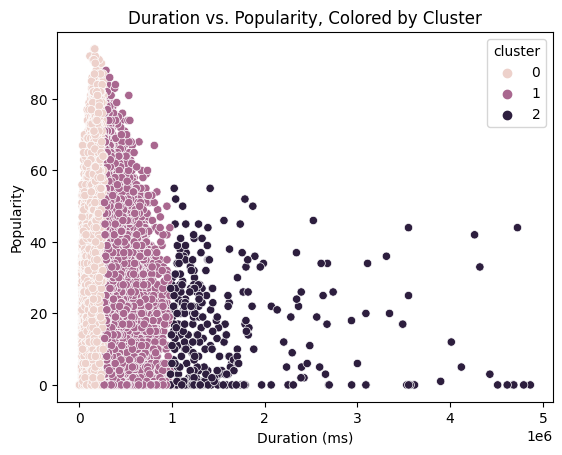

In [70]:
from sklearn.cluster import KMeans

# Extract the duration and popularity features
X = df[['duration_ms', 'popularity']]

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the dataframe
df['cluster'] = labels

# Create a scatterplot of duration vs. popularity, colored by cluster
sns.scatterplot(data=df, x='duration_ms', y='popularity', hue='cluster')
plt.title('Duration vs. Popularity, Colored by Cluster')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()
